In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# - instead of opening a sperate window for the graphs, it displays it in the notebook
%matplotlib inline 

In [2]:
df = pd.read_csv("height-weight.csv")
df.head(10)

Weight  Height
0      45     120
1      58     135
2      48     123
3      60     145
4      70     160
5      78     162
6      80     163
7      90     175
8      95     182
9      78     170

In [3]:
"""whenever we're implementing SLR, it is important to know the relationship between your independent and dependent features, whether 
they're correlated properly or not - meaning if one increases, does the other increase positively or not - aka directly propotional"""

"""in order to know the relationship between our independent and dependent features, we can either use df.corr() or we can make a scatter plot 
of our features to visualize the correlation"""

'in order to know the relationship between our independent and dependent features, we can either use df.corr() or we can make a scatter plot \nof our features to visualize the correlation'

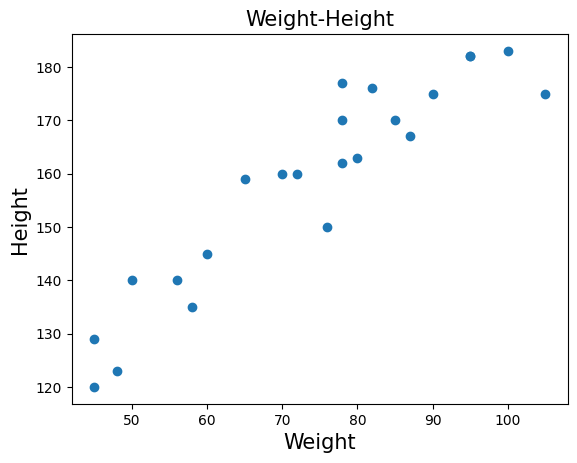

In [4]:
plt.scatter(df["Weight"], df["Height"])

plt.xlabel("Weight", fontsize=15)
plt.ylabel("Height", fontsize=15)
plt.title("Weight-Height", fontsize=15)
plt.show()

In [5]:
# checking if the correlation is either positive or negative
# look more into the df.corr function
df.corr()

Weight    Height
Weight  1.000000  0.931142
Height  0.931142  1.000000

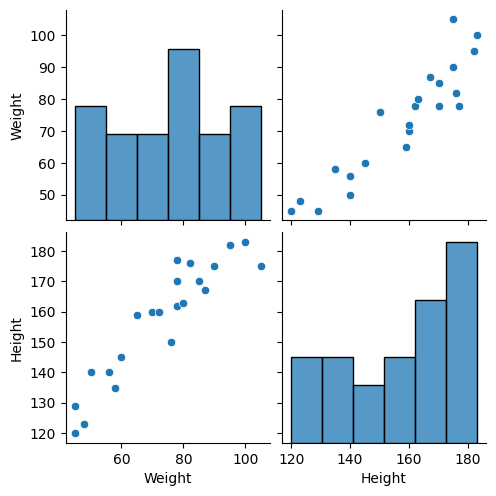

In [6]:
# look more into what is pairplot
sns.pairplot(df)

In [7]:
# ---------------- Dividing data into independent and dependent features -------------------------------------

# always make sure that our indepdent feature should be in form or dataframe or 2D array, not series.
# since number of indepdent feeaturs varies, that's why we have it as a 2D array - however for dependent feature since we only have one column, it can be in series.
# X = df["Weight"] - will create data in series format

X = df[ ["Weight"] ] # independent feature has to be in dataframe form or 2D array
y = df["Height"] # dependent feature can be in series form or 1D array

In [8]:
# dividing data into train-test-split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
""" 
the random_state parameter function is used to control the random shuffling and splitting of your dataset into training and testing sets.
Every time you run the train_test_split function with the same random_state value, you will get the same split of data. This is useful for ensuring that your results are consistent and can be reproduced by others.
"""
# look more into notes about random_state

' \nthe random_state parameter function is used to control the random shuffling and splitting of your dataset into training and testing sets.\nEvery time you run the train_test_split function with the same random_state value, you will get the same split of data. This is useful for ensuring that your results are consistent and can be reproduced by others.\n'

In [9]:
# after train-test-split, we have to perform a very important step called standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
# X_train

# we apply standardization to test-data aswell however instead of using "fit_tranform" we will simply use "tranform"
# what "tranform" does is apply the same formula of standardization on test data but instead of recalculating mean and standard deviation for test data, it uses earlier calculated values for mean and standard deviation from fit_transorm AKA "train data"
# we do the above because of data leakge - we don't want our train data to have any knowlege about test data - look more into data leakge

X_test = scaler.transform(X_test)
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [10]:
# Now we apply simple linear regression
from sklearn.linear_model import LinearRegression
regression = LinearRegression(n_jobs=-1) # n_jobs uses all the processors in your system to train the data

regression.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [11]:
# prints the value for the coefficient or slope aka beta-1 - it gives a list because there can be many slopes when working with multiple LR.
regression.coef_ 

array([17.2982057])

In [12]:
# prints the value for the intercept
regression.intercept_

156.47058823529412

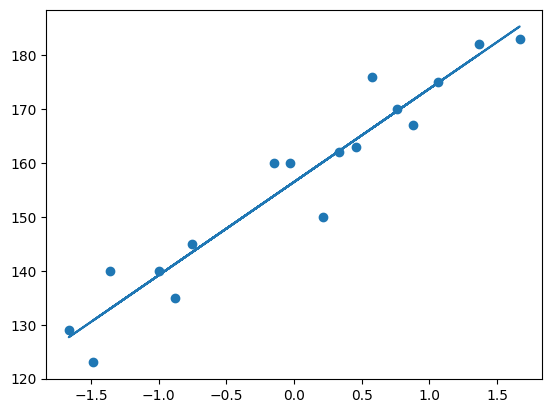

In [13]:
# plotting/visualizng the best fit line - training data

plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train))

# from graph, we can also see that the residual error is very less.
plt.show()

### How is prediction being done
1. predicted height output = intercept + coefficient*(weights)
2.                         = 156.4 + 17.29*(X value we want to predict for)

In [14]:
# prediction for test data
y_pred = regression.predict(X_test)
y_pred

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

In [15]:
# using performance metrics to evaluate the accuracy of the model
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

114.84069295228699
9.66512588679501
10.716374991212605


## R square 
Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares

In [16]:
from sklearn.metrics import r2_score

# used to show how accurate our model is - in percentage format
score = r2_score(y_test, y_pred)
score # shows that our model is 73 percent accurate

0.7360826717981276

**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [17]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6701033397476595

In [18]:
## ------------------------------------------------- Linear Regression using OLS method -----------------------------------------------------
import statsmodels.api as sm

model = sm.OLS(y_train, X_train).fit()

prediction=model.predict(X_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [19]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Fri, 24 Nov 2023   Prob (F-statistic):                       0.664
Time:                        19:29:49   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\notmo\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [20]:
## Prediction For new data - make sure to always transforn the data when predicting for new values - we have only done transformation for train and test data and not the new data
regression.predict(scaler.transform([[70]]))

C:\Users\notmo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([153.88159699])